In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
root_dir = os.path.abspath('../')
sys.path.append(root_dir)
sys.path.append(os.path.join(root_dir,'../DPMJET-III-gitlab'))
print root_dir

pythia_dir = os.path.join(
    os.path.expanduser('~'), 'devel', 'apps', 'pythia8240')
sys.path.append(os.path.join(pythia_dir, 'lib'))

from impy.definitions import *
from impy.constants import *
from impy.kinematics import EventKinematics
from impy.common import impy_config, pdata

/home/users/afedynitch/devel/git/impy


In [3]:
# AF: This is what the user interaction has to yield.
# It is the typical expected configuration that one
# wants to run (read pp-mode at energies not exceeding
# 7 TeV). If you want cosmic ray energies, this should
# be rather p-N at 10 EeV and lab frame (not yet defined).

event_kinematics = EventKinematics(
    ecm= 7000 * GeV,
    p1pdg=2212,
    p2pdg=2212
#     nuc2_prop=(12,6)
)

In [4]:
impy_config["user_frame"] = 'center-of-mass'
impy_config['tau_stable'] = 10e-12
impy_config['pi0_stable'] = True

In [5]:
# Define the two models
m1 = 'DPMJETIII171'
m2 = 'QGSJET01C'

In [6]:
gen_m1 = make_generator_instance(interaction_model_by_tag[m1])
gen_m1.init_generator(event_kinematics)
# import IPython
# IPython.embed()
gen_m2 = make_generator_instance(interaction_model_by_tag[m2])
gen_m2.init_generator(event_kinematics)


impy.models.dpmjetIII.DpmjetIIIRun::init_generator(): Initializing DPMJET-III


In [7]:
n_bins = 30
bins = np.linspace(-1,1.,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])

m1_pions = np.zeros(n_bins)
m1_protons = np.zeros(n_bins)

eta_bins = np.linspace(-7,7,n_bins+1)
eta_grid = 0.5*(eta_bins[1:] + eta_bins[:-1])
widths_eta = (eta_bins[1:] - eta_bins[:-1])

m1_charged_eta = np.zeros(n_bins)

n_events = 2000
norm = 1./float(n_events)

# This
for event in gen_m1.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    m1_protons += norm/widths*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    m1_pions += norm/widths*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
    m1_charged_eta += norm/widths_eta*np.histogram(event.eta,bins=eta_bins)[0]

In [8]:
m2_pions = np.zeros(n_bins)
m2_protons = np.zeros(n_bins)
m2_charged_eta = np.zeros(n_bins)

for event in gen_m2.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    m2_protons += norm/widths*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    m2_pions += norm/widths*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
    m2_charged_eta += norm/widths_eta*np.histogram(event.eta,bins=eta_bins)[0]

[]

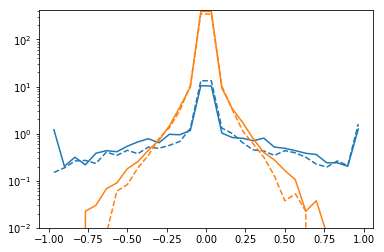

In [9]:
l=plt.plot(grid, m1_protons,label=m1)[0]
plt.plot(grid, m2_protons,c=l.get_color(), ls='--',label=m2)
l=plt.plot(grid, m1_pions,label=m1)[0]
plt.plot(grid, m2_pions,c=l.get_color(), ls='--',label=m2)
plt.ylim(1e-2,)
plt.semilogy()

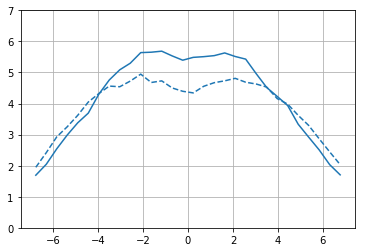

In [10]:
l=plt.plot(eta_grid, m1_charged_eta, label=m1)[0]
plt.plot(eta_grid, m2_charged_eta,c=l.get_color(), ls='--', label=m2)
plt.ylim(0,7)
plt.grid()
# plt.semilogy()

In [11]:
event_kinematics

Event kinematics:
	ecm      : 7000.00000
	pcm      : 3499.99987
	elab     : 26111886.77033
	plab     : 26111886.77033
	gamma_cm : 3730.26967
	bgamm_cm : 3730.26954
	pdgid 1  :       2212
	nucprop 1: 1/1
	pdgid 2  :       2212
	nucprop 2: 1/1

In [12]:
impy_config["qgsjet"]

{'datdir': 'src/qgsjet/data/',
 'has_boosts': False,
 'has_hepevt': True,
 'int_support': ['hh', 'hA', 'AA'],
 'output_frame': ['laboratory'],
 'projectiles': {'01c': [2212, 2112, 321, -321, 211, -211],
  'II-03': [2212, 2112, 321, -321, 211, -211],
  'II-04': [2212, 2112, 321, -321, 211, -211]},
 'sqs_min_GeV': 10.0}

In [13]:
impy_config["qgsjet"]["output_frame"] = 'laboratory'
for event in gen_m2.event_generator(event_kinematics, 10):
    for pid, x, y, z, e in zip(event.p_ids, event.px, event.py, event.pz, event.en):
        print '{0:8}: {1:10.2e} {2:10.2e} {3:10.2e} {4:10.2e}'.format(pid, x, y, z, e) 

     111:   3.71e-01   1.51e-02   1.12e+02   1.12e+02
     211:   8.87e-02  -6.62e-02   7.05e+01   7.05e+01
    3122:  -2.24e-01   1.24e-01   1.36e+03   1.36e+03
     111:  -8.49e-02   8.93e-02   4.80e+01   4.80e+01
     310:  -1.50e-01  -1.62e-01   9.17e+02   9.17e+02
     211:   1.09e-01   5.54e-02  -1.42e+02   1.42e+02
    2112:  -1.09e-01  -5.54e-02  -2.44e+03   2.44e+03
   -2112:   8.75e-01  -1.04e+00   2.05e+02   2.05e+02
     211:   2.80e-01   7.45e-01   3.66e+02   3.66e+02
    2112:   5.54e-03  -5.79e-01   7.15e+01   7.15e+01
    -211:  -3.22e-01   1.96e-01   1.62e+02   1.62e+02
     211:  -2.00e-02  -3.83e-02   7.66e+00   7.66e+00
    -211:   9.49e-01  -9.09e-01   4.79e+01   4.79e+01
     211:   4.70e-01   1.26e-02   2.77e+01   2.77e+01
     211:   5.08e-02   2.49e-01  -1.80e+01   1.80e+01
     111:  -8.26e-02  -3.72e-01   2.16e+01   2.16e+01
    -211:  -5.18e-02  -1.85e-01   4.36e+00   4.36e+00
    -211:  -1.68e-01   1.81e-01  -3.54e+02   3.54e+02
     211:   4.43e-01   7.99e